## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'bigmart_test.csv',
 'bigmart_train.csv',
 'Big_Mart Sales Prediction.ipynb']

In [3]:
train = pd.read_csv("bigmart_train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Univariate Analysis

#### Univariate analysis for Dependent Variable - Item_Outlet_Sales

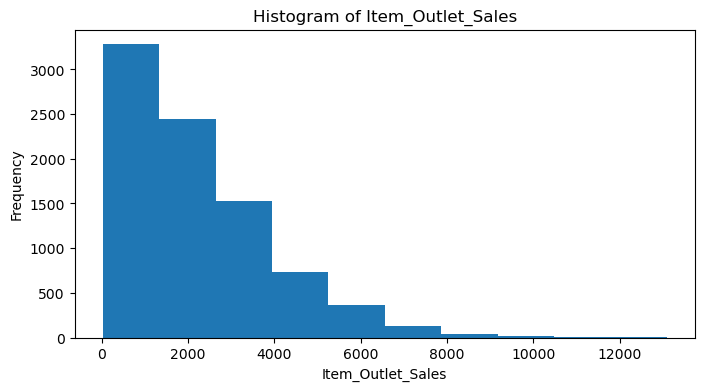

In [8]:
#Histogram
plt.figure(figsize=(8,4))
plt.xlabel('Item_Outlet_Sales')
plt.ylabel("Frequency")
plt.title("Histogram of Item_Outlet_Sales")
plt.hist(train.Item_Outlet_Sales)
plt.show()

<Axes: >

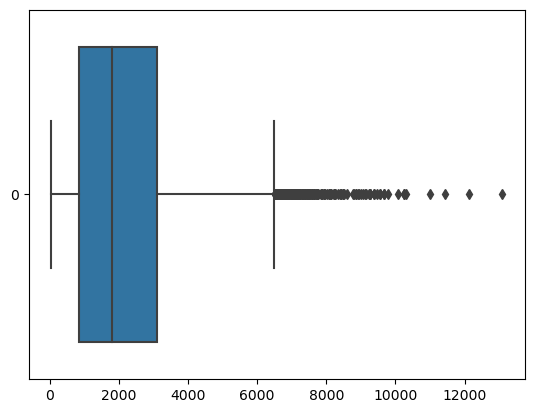

In [9]:
sns.boxplot(train.Item_Outlet_Sales, orient = 'h')

We will not do any outlier treatment for Target variable as we need the outlier information to get the prediction for the items with least sales

### Univariate analysis on independent variables

In [10]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [11]:
#add new column to calculate the age of the outlet
train['Outlet_age'] = 2023 - train['Outlet_Establishment_Year']
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


#### Item Weight 

In [12]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
# fill the missing values with the mean 
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())

In [14]:
train.Item_Weight.describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

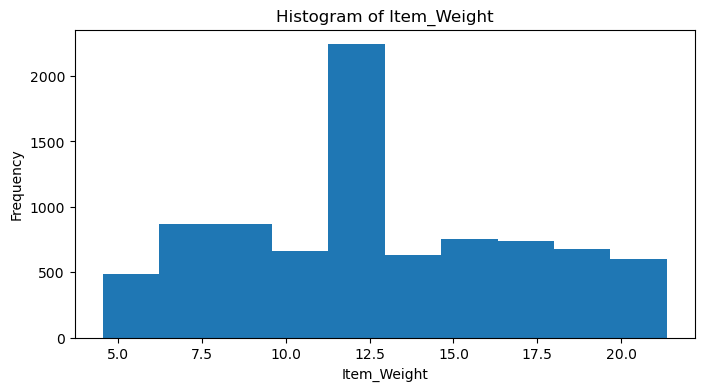

In [15]:
#Histogram
plt.figure(figsize=(8,4))
plt.xlabel('Item_Weight')
plt.ylabel("Frequency")
plt.title("Histogram of Item_Weight")
plt.hist(train.Item_Weight)
plt.show()

#### Item_Fat_Content

In [16]:
# check unique content
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
#As few duplicates entry names, rename the observations to proper spellings

train['Item_Fat_Content'] = train.Item_Fat_Content.replace(['low fat', 'LF'],'Low Fat').replace('reg', 'Regular')

In [18]:
# Recheck if the operation applied
# storing in f1 to identify label encoding
f1 = train.Item_Fat_Content.unique()
f1

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
# apply label encoder to transform the data
le = LabelEncoder()
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
f2 = train['Item_Fat_Content'].unique()
f2

array([0, 1])

In [20]:
# Zip and check which label is encoded to which code
dict(zip(f1,f2))

{'Low Fat': 0, 'Regular': 1}

In [21]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


#### Item_Visibility

<Axes: >

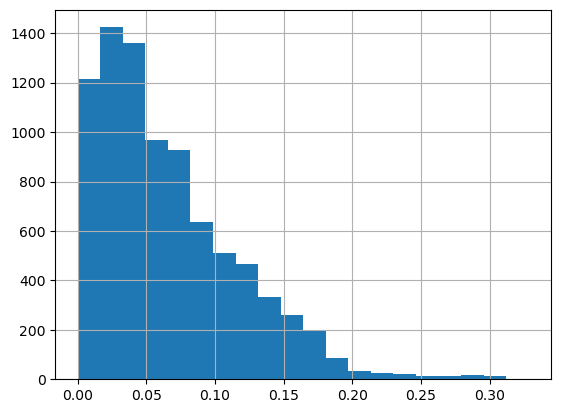

In [22]:
train.Item_Visibility.hist(bins = 20)

<Axes: >

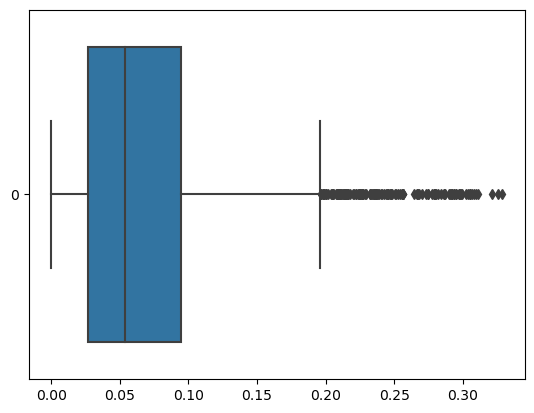

In [23]:
sns.boxplot(train.Item_Visibility, orient = 'h')

In [24]:
Q1 = train.Item_Visibility.quantile(0.25)
Q3 = train.Item_Visibility.quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
print(lb)
ub = Q3 + 1.5*IQR
print(ub)

-0.07440424500000001
0.195979015


In [25]:
filt_train = train.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')

In [26]:
filt_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14


In [27]:
filt_train.shape, train.shape

((8379, 13), (8523, 13))

In [28]:
train = filt_train

In [29]:
train.shape

(8379, 13)

In [30]:
train['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.093914      2
0.086765      2
0.046825      2
           ... 
0.124646      1
0.054142      1
0.018920      1
0.044974      1
0.044878      1
Name: count, Length: 7736, dtype: int64

In [31]:
# Create a new column to categorize the Item visibility in terms of low_viz, viz, high_viz

train['Item_Visibility_bins']=pd.cut(train['Item_Visibility'],[-0.000001,0.065,0.13,0.2],labels=["Low viz","Viz","High viz"])

In [32]:
train['Item_Visibility_bins'].value_counts()

Item_Visibility_bins
Low viz     4929
Viz         2557
High viz     893
Name: count, dtype: int64

In [33]:
train.Item_Visibility_bins.unique()

['Low viz', 'Viz', 'High viz']
Categories (3, object): ['Low viz' < 'Viz' < 'High viz']

In [34]:
train['Item_Visibility_bins'] = train['Item_Visibility_bins'].fillna('Low viz')

In [35]:
# Encoding using label encoder
le = LabelEncoder()
train['Item_Visibility_bins'] = le.fit_transform(train['Item_Visibility_bins'])

In [36]:
train.Item_Visibility_bins.unique()

array([1, 2, 0])

#### Outlet_size

In [37]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [38]:
train['Outlet_Size'].mode()[0]

'Medium'

In [39]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [40]:
o1 = train['Outlet_Size'].unique()

In [41]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_age                   0
Item_Visibility_bins         0
dtype: int64

In [42]:
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

In [43]:
o2 = train['Outlet_Size'].unique()

In [44]:
dict(zip(o1,o2))

{'Medium': 1, 'High': 0, 'Small': 2}

In [45]:
train['Outlet_Size'].value_counts()

Outlet_Size
1    5136
2    2311
0     932
Name: count, dtype: int64

#### Item_MRP

In [46]:
train.Item_MRP.describe()

count    8379.000000
mean      140.968471
std        62.272255
min        31.290000
25%        93.794900
50%       142.915400
75%       185.625300
max       266.888400
Name: Item_MRP, dtype: float64

<Axes: >

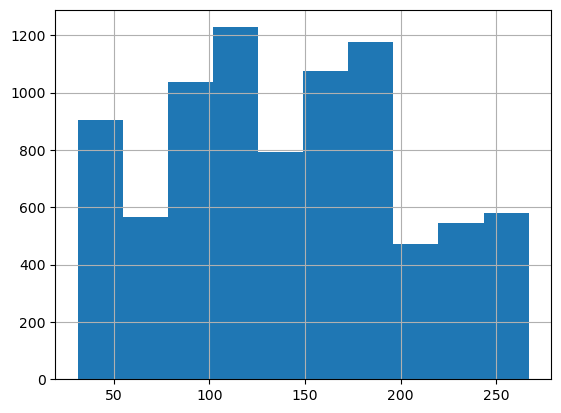

In [47]:
train.Item_MRP.hist()

In [48]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,24,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,14,1


#### Outlet_Location_Type

In [49]:
l1 = train.Outlet_Location_Type.unique()
l1

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [50]:
# Apply label Encoding as it is ordinal data

train.Outlet_Location_Type = le.fit_transform(train.Outlet_Location_Type)

In [51]:
l2 = train.Outlet_Location_Type.unique()
l2

array([0, 2, 1])

In [52]:
dict(zip(l1,l2))

{'Tier 1': 0, 'Tier 3': 2, 'Tier 2': 1}

#### Outlet_Type

In [53]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [54]:
# do one hot encoding or get dummies

type_dummies = pd.get_dummies(train['Outlet_Type']).astype('uint8')

In [55]:
type_dummies.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [56]:
train = pd.concat([train, type_dummies], axis = 1)

In [57]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [58]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age',
       'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [59]:
# dropping object type columns, which have not much importance. Dropping Grocery store, as the other 3 dummies can indicate well

train = train.drop(['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year' , 'Outlet_Type', 'Grocery Store'], axis = 1)

In [60]:
train.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Item_Outlet_Sales       float64
Outlet_age                int64
Item_Visibility_bins      int32
Supermarket Type1         uint8
Supermarket Type2         uint8
Supermarket Type3         uint8
dtype: object

In [61]:
train.shape

(8379, 11)

In [62]:
train.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_age,Item_Visibility_bins,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,249.8092,1,0,3735.1380,24,1,1,0,0
1,5.92,1,48.2692,1,2,443.4228,14,1,0,1,0
2,17.50,0,141.6180,1,0,2097.2700,24,1,1,0,0
3,19.20,1,182.0950,1,2,732.3800,25,1,0,0,0
4,8.93,0,53.8614,0,2,994.7052,36,1,1,0,0


### Performing Linear Regression

In [63]:
y = train.pop('Item_Outlet_Sales')
X = train

In [64]:
y.head(1)

0    3735.138
Name: Item_Outlet_Sales, dtype: float64

### Load test dataset and perform the data manipulation steps

In [65]:
test = pd.read_csv('bigmart_test.csv')

In [66]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [67]:
test.shape

(5681, 11)

In [68]:
c1 = test.Item_Fat_Content.unique()
c1

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [69]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat').replace('reg', 'Regular')

In [70]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [71]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

In [72]:
c2 = test.Item_Fat_Content.unique()
c2

array([0, 1])

In [73]:
set(zip(c1,c2))

{('Low Fat', 0), ('reg', 1)}

In [74]:
test['Outlet_age'] = 2023 - test['Outlet_Establishment_Year']

In [75]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_age                      0
dtype: int64

In [76]:
test.Item_Weight.describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [77]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [78]:
# Create a new column to categorize the Item visibility in terms of low_viz, viz, high_viz

test['Item_Visibility_bins']=pd.cut(test['Item_Visibility'],[0.000,0.065,0.13,0.3],labels=["Low viz","Viz","High viz"])

In [79]:
test['Item_Visibility_bins'] = test['Item_Visibility_bins'].fillna('Low viz')

In [80]:
v1 = test['Item_Visibility_bins'].unique()
v1

['Low viz', 'Viz', 'High viz']
Categories (3, object): ['Low viz' < 'Viz' < 'High viz']

In [81]:
test['Item_Visibility_bins'] = le.fit_transform(test['Item_Visibility_bins'])

In [82]:
v2 = test['Item_Visibility_bins'].unique()
v2

array([1, 2, 0])

In [83]:
dict(zip(v1,v2))

{'Low viz': 1, 'Viz': 2, 'High viz': 0}

In [84]:
test['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [85]:
test['Outlet_Size'].mode()[0]

'Medium'

In [86]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].unique()[0])

In [87]:
s1 = test['Outlet_Size'].unique()
s1

array(['Medium', 'Small', 'High'], dtype=object)

In [88]:
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

In [89]:
s2 = test['Outlet_Size'].unique()
s2

array([1, 2, 0])

In [90]:
list(zip(s1,s2))

[('Medium', 1), ('Small', 2), ('High', 0)]

In [91]:
lt1 = test['Outlet_Location_Type'].unique()
lt1

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [92]:
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [93]:
lt2 = test['Outlet_Location_Type'].unique()
lt2

array([0, 1, 2])

In [94]:
tuple(zip(lt1,lt2))

(('Tier 1', 0), ('Tier 2', 1), ('Tier 3', 2))

In [95]:
test['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [96]:
dummies = pd.get_dummies(test['Outlet_Type']).astype('uint8')

In [97]:
dummies.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [98]:
test = pd.concat([test, dummies], axis = 1)


In [99]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.75,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,24,1,0,1,0,0
1,FDW14,8.30,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,16,1,0,1,0,0


In [100]:
test = test.drop(['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Grocery Store'], axis = 1)

In [101]:
test.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_age                int64
Item_Visibility_bins      int32
Supermarket Type1         uint8
Supermarket Type2         uint8
Supermarket Type3         uint8
dtype: object

In [102]:
X.columns , test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_age', 'Item_Visibility_bins',
        'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_age', 'Item_Visibility_bins',
        'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
lin = LinearRegression()
lin.fit(xtrain, ytrain)

LinearRegression()

In [106]:
print('Coefficients:', xtrain.columns, lin.coef_)
print()
print('Intercept:', lin.intercept_)

Coefficients: Index(['Item_Weight', 'Item_Fat_Content', 'Item_MRP', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_age', 'Item_Visibility_bins',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object') [ 3.34086784e+00  2.65059164e+01  1.59634961e+01  1.66852779e+01
  8.12918672e+00 -2.29070742e+00  1.78685677e+01  1.97751181e+03
  1.63575712e+03  3.41579553e+03]

Intercept: -1951.9256012218457


In [107]:
pred = lin.predict(xtest)

In [108]:
print(np.sqrt(mean_squared_error(ytest, pred)))

1118.604509793914


In [109]:
r2_score(ytest, pred)

0.5484618699474251

### Predicting with Test data

In [110]:
test_pred = lin.predict(test)
test_pred

array([1796.34388452, 1479.78232089, 1967.50000447, ..., 1967.01100333,
       3535.3533713 , 1370.10024122])

In [111]:
# we can't evaluate with Test data set as they don't provide output variable in the test.

### Use Ridge, Lasso & ElasticNet Regression to evaluate the model

#### Ridge Regression

In [112]:
from sklearn.linear_model import Ridge
lin_r = Ridge(alpha=0.001)
lin_r.fit(xtrain, ytrain)
print(sqrt(mean_squared_error(ytest, lin_r.predict(xtest))))
print(sqrt(mean_squared_error(ytrain, lin_r.predict(xtrain))))
print("R squared/ coefficient of Determination: {}".format(lin_r.score(xtest, ytest)))

1118.604378619023
1139.5617187557136
R squared/ coefficient of Determination: 0.5484619758480558


In [113]:
from sklearn.linear_model import Lasso
lin_l = Lasso(alpha=0.001)
lin_l.fit(xtrain, ytrain)
print(sqrt(mean_squared_error(ytest, lin_l.predict(xtest))))
print(sqrt(mean_squared_error(ytrain, lin_l.predict(xtrain))))
print("R squared/ coefficient of Determination: {}".format(lin_l.score(xtest, ytest)))

1118.604222060785
1139.5617188161323
R squared/ coefficient of Determination: 0.548462102241254


In [114]:
from sklearn.linear_model import ElasticNet
lin_e = ElasticNet(alpha=0.001)
lin_e.fit(xtrain, ytrain)
print(sqrt(mean_squared_error(ytest, lin_e.predict(xtest))))
print(sqrt(mean_squared_error(ytrain, lin_e.predict(xtrain))))
print("R squared/ coefficient of Determination: {}".format(lin_e.score(xtest, ytest)))

1118.2959275391727
1139.630154831568
R squared/ coefficient of Determination: 0.5487109614433001


###### Note that these are the scores without normalization. Next time, Normalize the data and then run the models